In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 9)

In [5]:
# Checking null values

df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [6]:
# checking all the params mean,min,max ....etc

df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [9]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [12]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

In [13]:
# train, test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
# Applying linear Regression without any transformer

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.6275531792314852

In [15]:
# cross checking with cross value score

lr = LinearRegression()
np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.4609940491662865

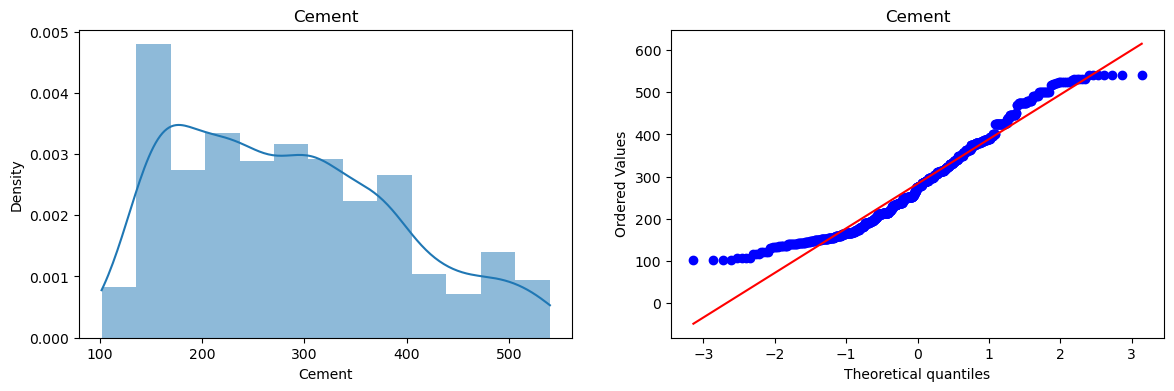

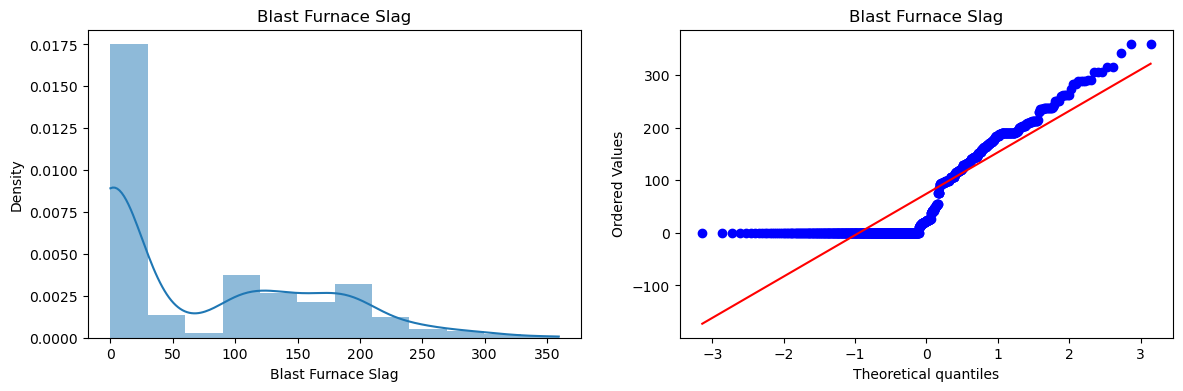

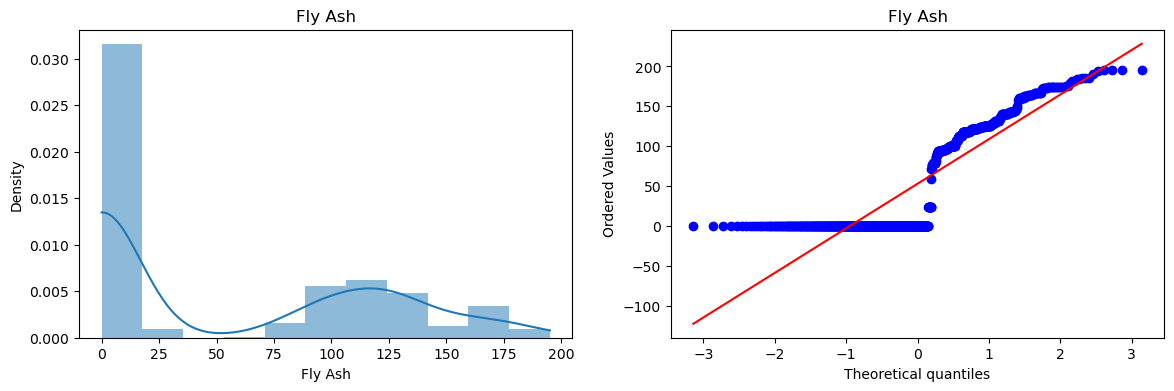

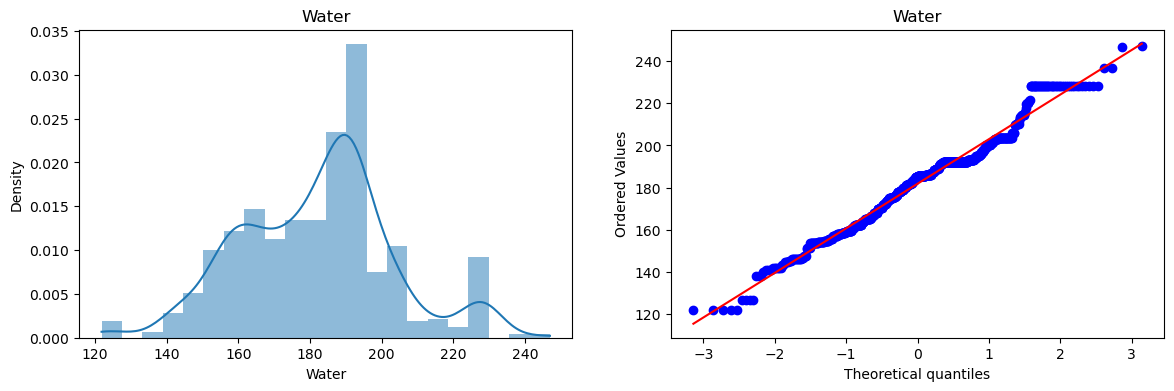

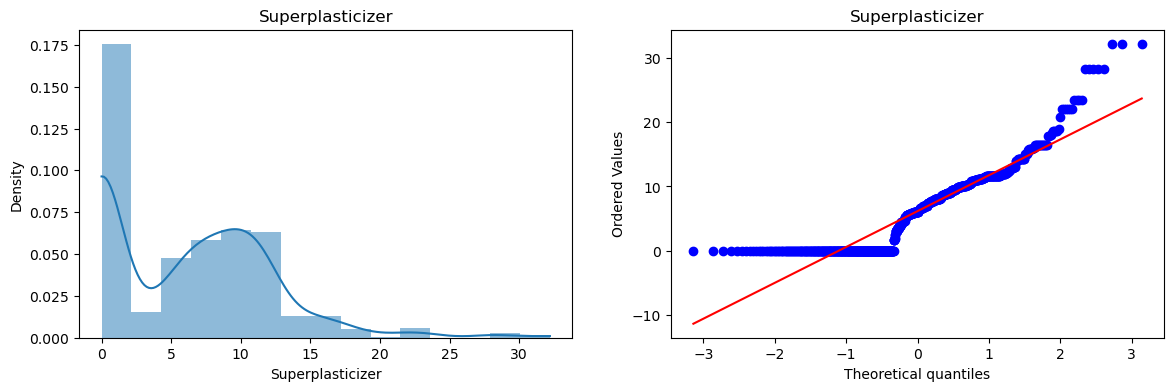

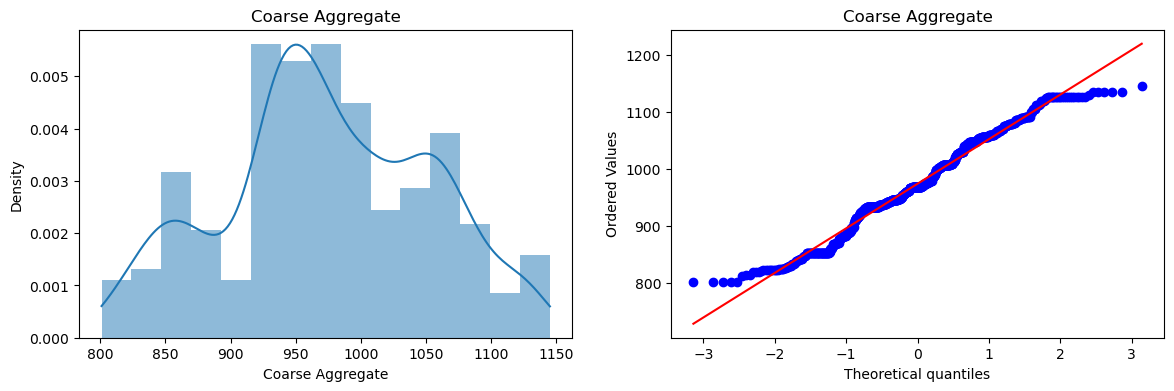

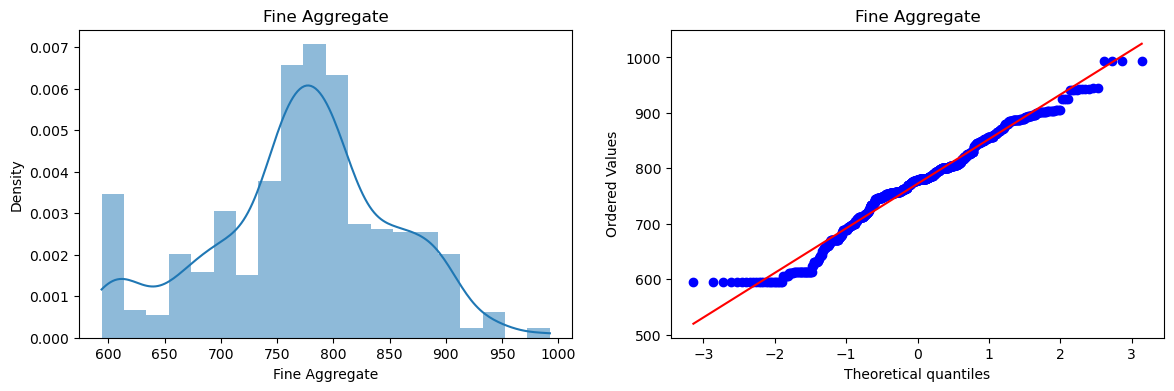

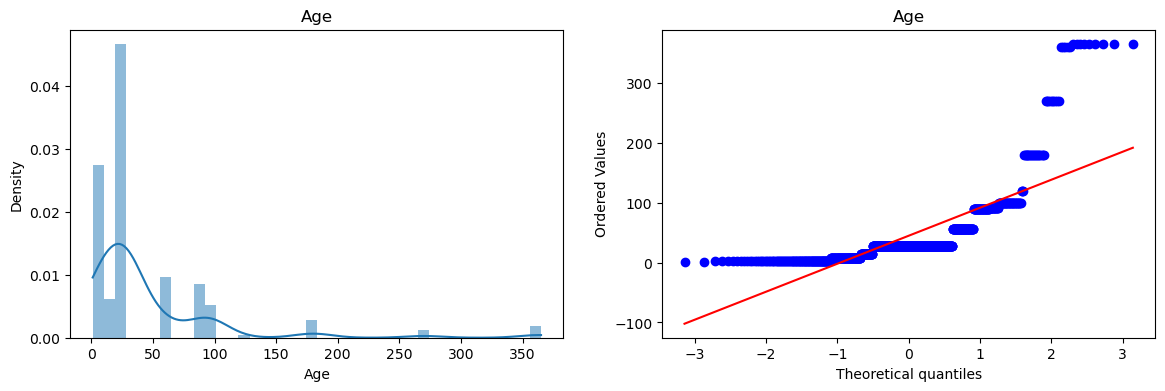

In [18]:
# plotting the displot without any transformation

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True, stat="density", linewidth=0)
    plt.title(col)
    
    plt.subplot(122)
    stats.probplot(X_train[col], dist="norm", plot=plt)
    plt.title(col)
    
    plt.show()

In [19]:
# Applying Box-Cox Transformer
# by default its value is Yeo-Johnson

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.000001)
X_test_transformed = pt.fit_transform(X_test+0.000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_})

,cols,box_cox_lambdas
0,Cement,0.215602
1,Blast Furnace Slag,0.025996
2,Fly Ash,-0.006544
3,Water,0.959062
4,Superplasticizer,0.103365
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [20]:
# Applying linear regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed, y_train)

y_pred2 = lr.predict(X_test_transformed)
r2_score(y_test,y_pred2)

0.8055321005305189

In [23]:
# using cross value score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.000001)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_transformed,y,scoring='r2'))

0.666295032787932

In [24]:
# converting numpy array to DataFrame

X_train_transformed = pd.DataFrame(X_train_transformed,columns=X_train.columns)

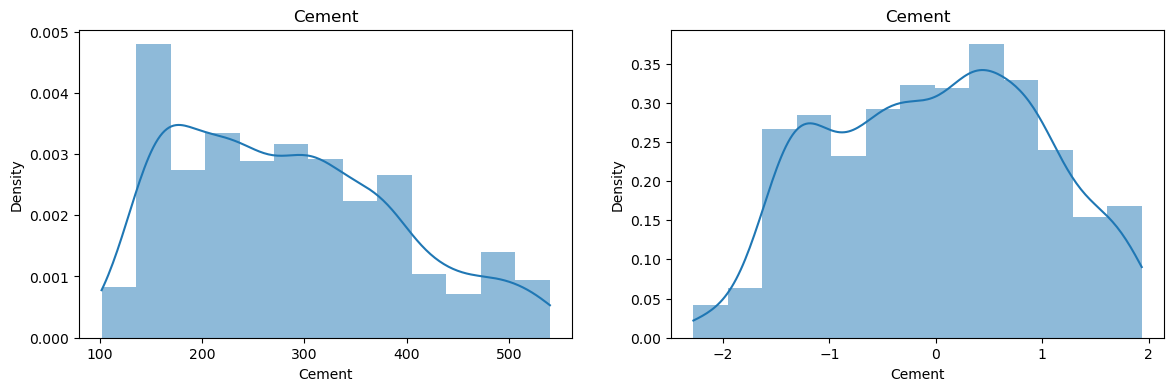

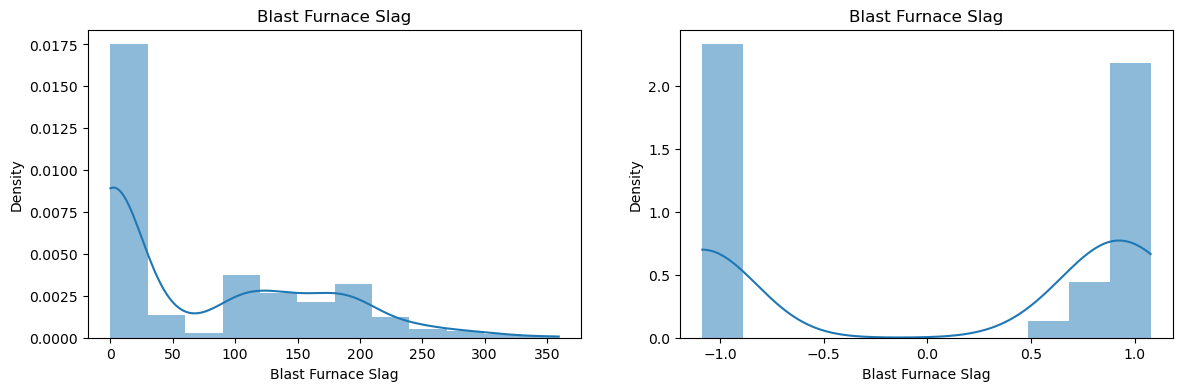

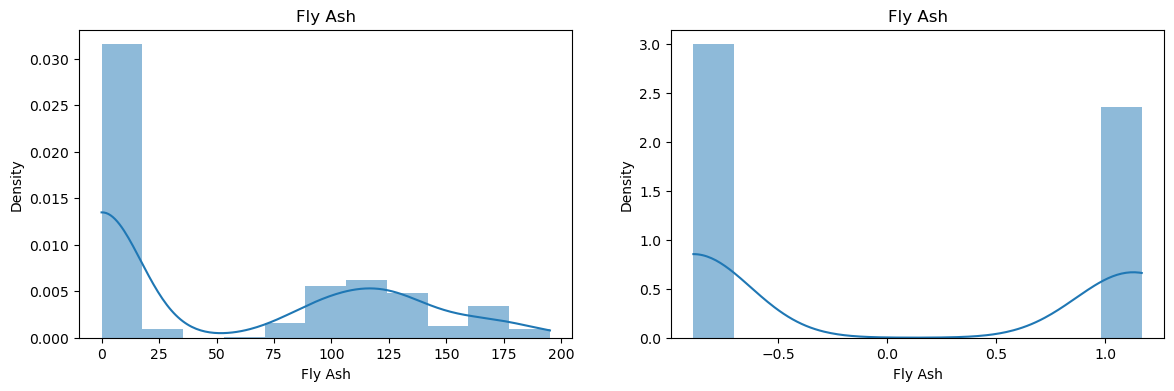

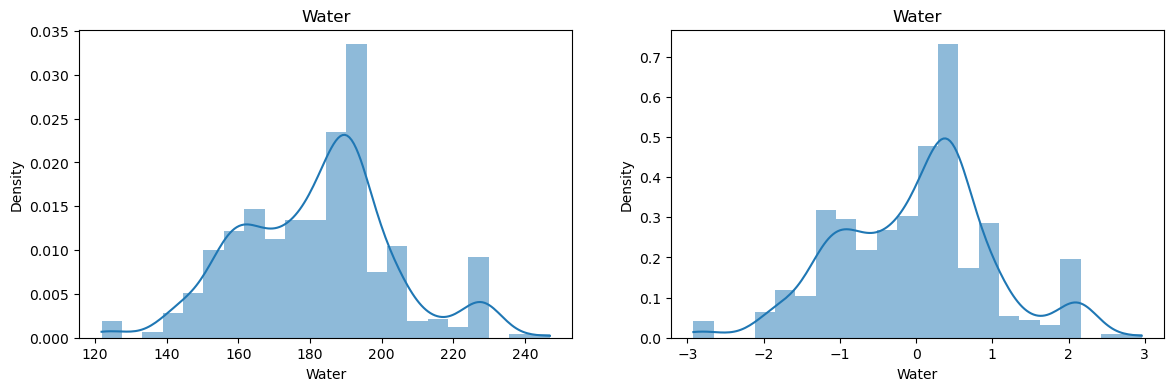

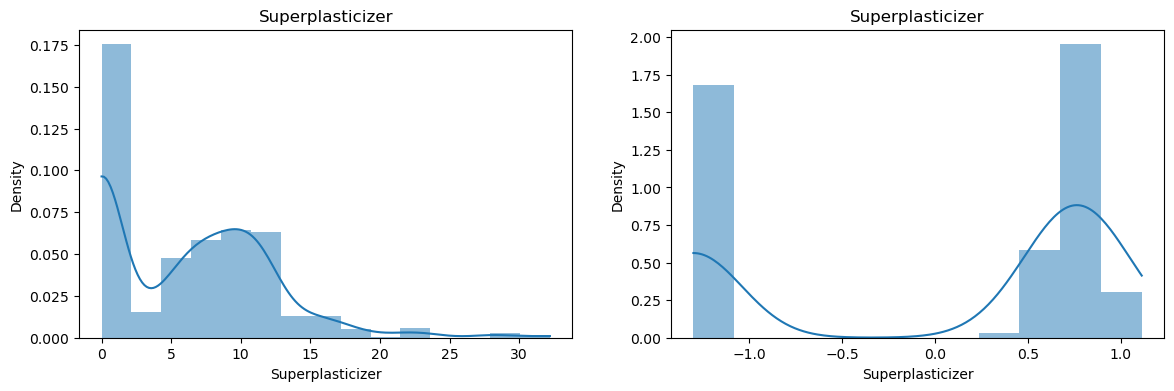

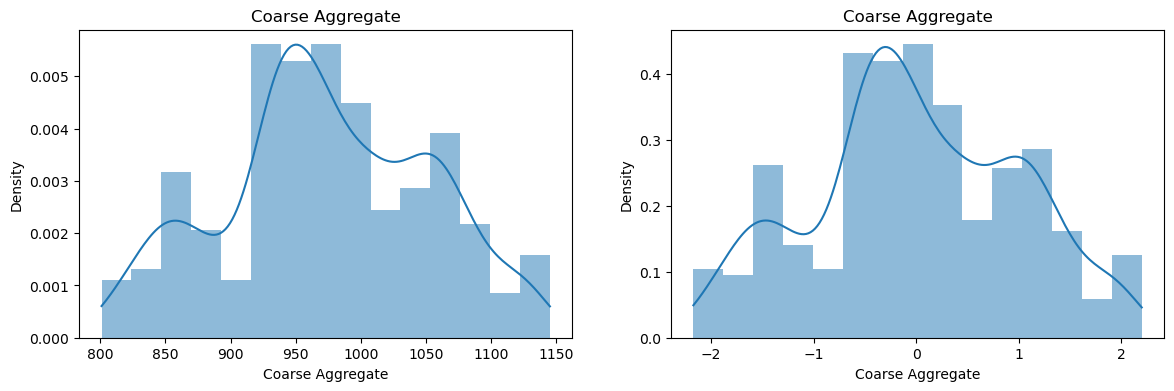

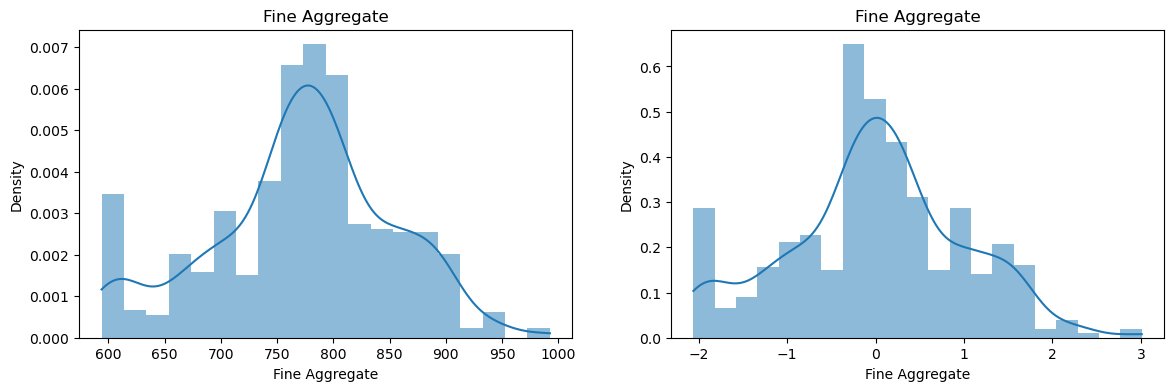

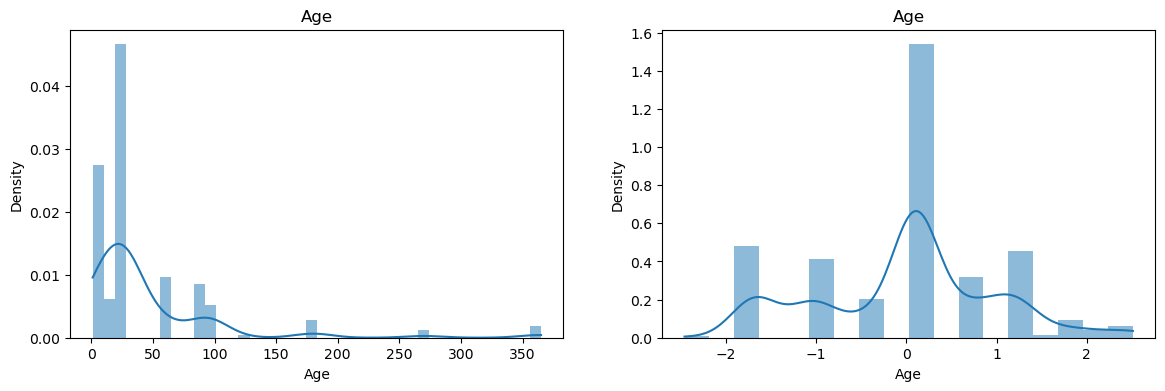

In [27]:
# Before and After comparison for Box-Cox value

for col in X_train_transformed.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True, stat="density", linewidth=0)
    plt.title(col)
    
    plt.subplot(122)
    sns.histplot(X_train_transformed[col], kde=True, stat="density", linewidth=0)
    plt.title(col)
    
    plt.show()

In [29]:
# Apply Yeo-Johnson Transformer

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.fit_transform(X_test)

# Apply model

lr2 = LinearRegression()
lr2.fit(X_train_transformed2, y_train)

y_pred3 = lr2.predict(X_test_transformed2)


In [31]:
# Checking scoring

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns, 'Yeo-Johnson_lambdas':pt1.lambdas_})

0.8153845514999157


,cols,Yeo-Johnson_lambdas
0,Cement,0.213025
1,Blast Furnace Slag,0.020476
2,Fly Ash,-0.038218
3,Water,0.958936
4,Superplasticizer,0.304951
5,Coarse Aggregate,1.192751
6,Fine Aggregate,1.975085
7,Age,-0.062443


In [32]:
# Applying cross value score on Yeo-Johnson

pt3 = PowerTransformer()
X_train_transformed2 = pt3.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr,X_train_transformed2,y,scoring='r2'))

0.6834625141500863

In [33]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2,columns=X_train.columns)

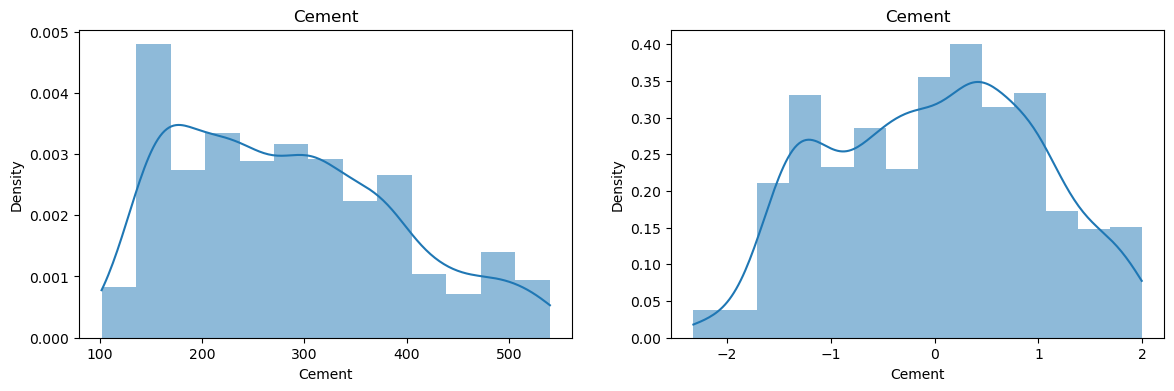

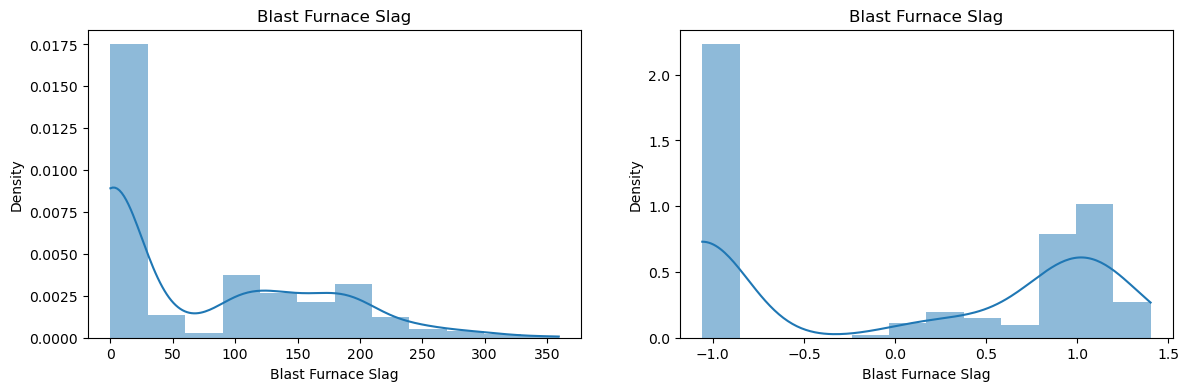

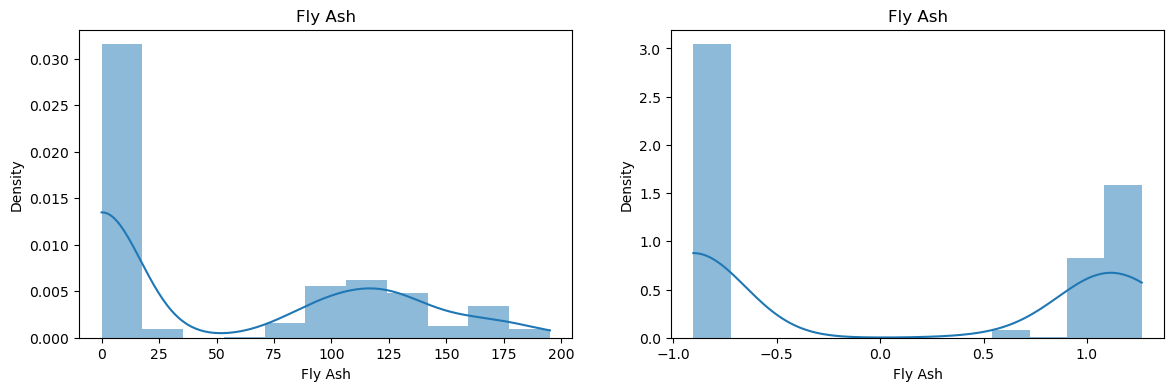

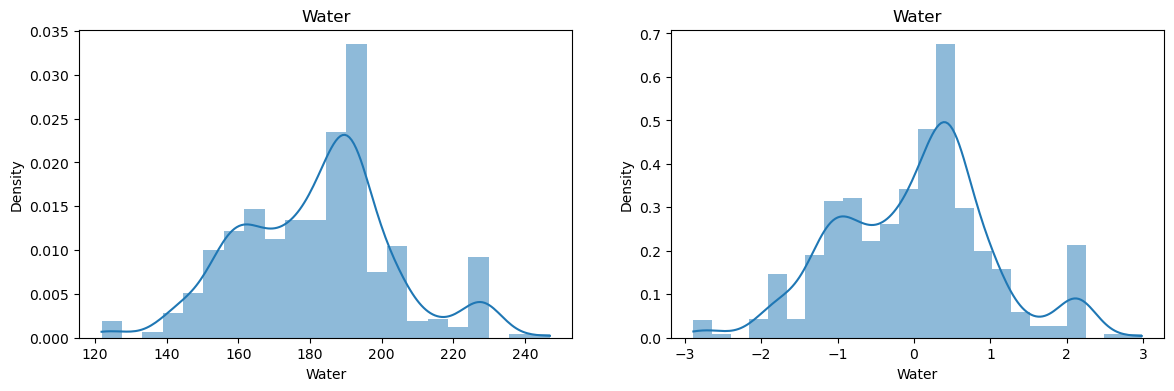

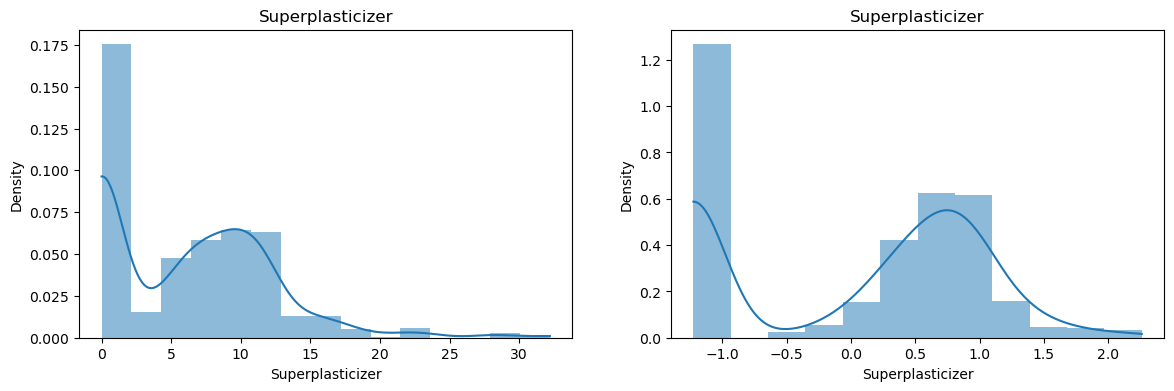

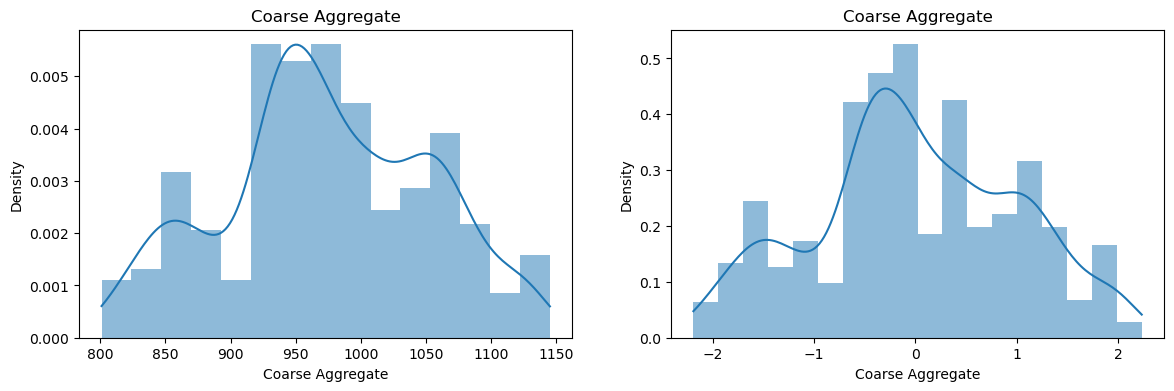

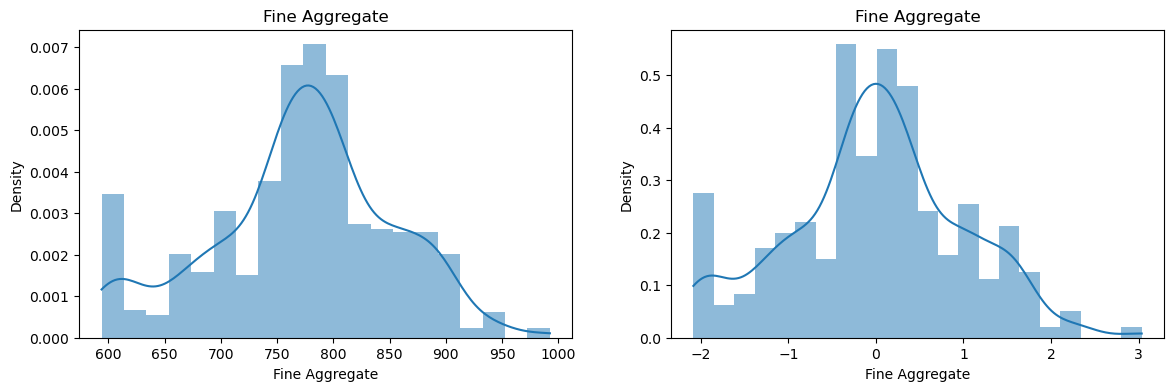

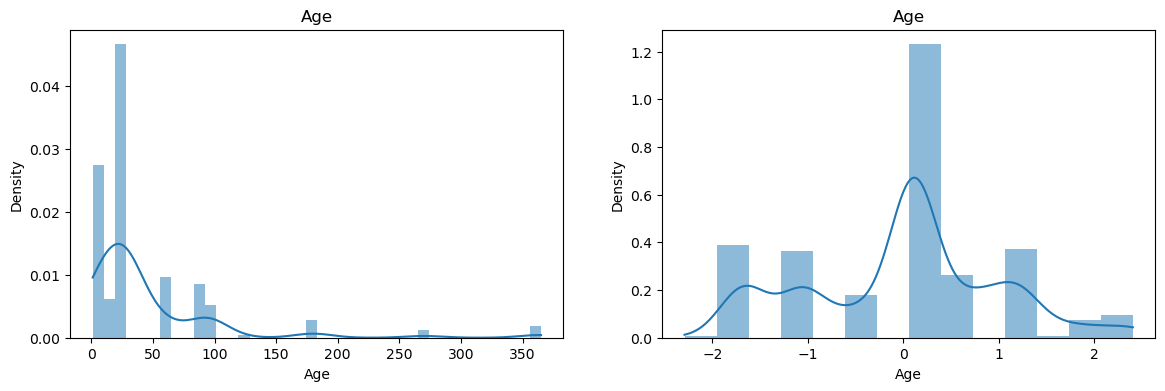

In [35]:
# Before and after comparision for Yeo-Johnson

for col in X_train_transformed2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col],kde=True, stat="density", linewidth=0)
    plt.title(col)

    plt.subplot(122)
    sns.histplot(X_train_transformed2[col],kde=True, stat="density", linewidth=0)
    plt.title(col)

    plt.show()

In [37]:
# Side by Side Lambdas

pd.DataFrame({'cols':X_train.columns,'Box-Cox-Lambdas':pt.lambdas_,'Yeo-Johnson-Lambdas':pt1.lambdas_})

,cols,Box-Cox-Lambdas,Yeo-Johnson-Lambdas
0,Cement,0.172271,0.213025
1,Blast Furnace Slag,0.025273,0.020476
2,Fly Ash,-0.032412,-0.038218
3,Water,0.809568,0.958936
4,Superplasticizer,0.099711,0.304951
5,Coarse Aggregate,1.129168,1.192751
6,Fine Aggregate,1.829625,1.975085
7,Age,0.048975,-0.062443
